In [1]:
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

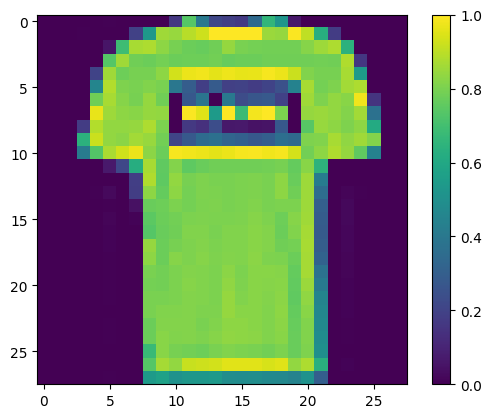

In [19]:
plt.figure()
plt.imshow(train_image[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_image = train_image/255
test_image = test_image/255

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128 ,activation='relu'),
    tf.keras.layers.Dense(10)]
)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(train_image,train_label ,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5022 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3739 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3340 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3107 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2934 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2781 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2456 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.

In [10]:
probability = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [21]:
prediction = probability.predict(test_image)

313/313 [==============================] - 1s 2ms/step


In [22]:
prediction[0]

array([2.52309314e-06, 9.49074330e-09, 1.35336755e-08, 1.45109730e-10,
       1.28115835e-06, 3.11487063e-04, 8.35503755e-08, 6.30923733e-03,
       1.30297155e-06, 9.93374109e-01], dtype=float32)

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



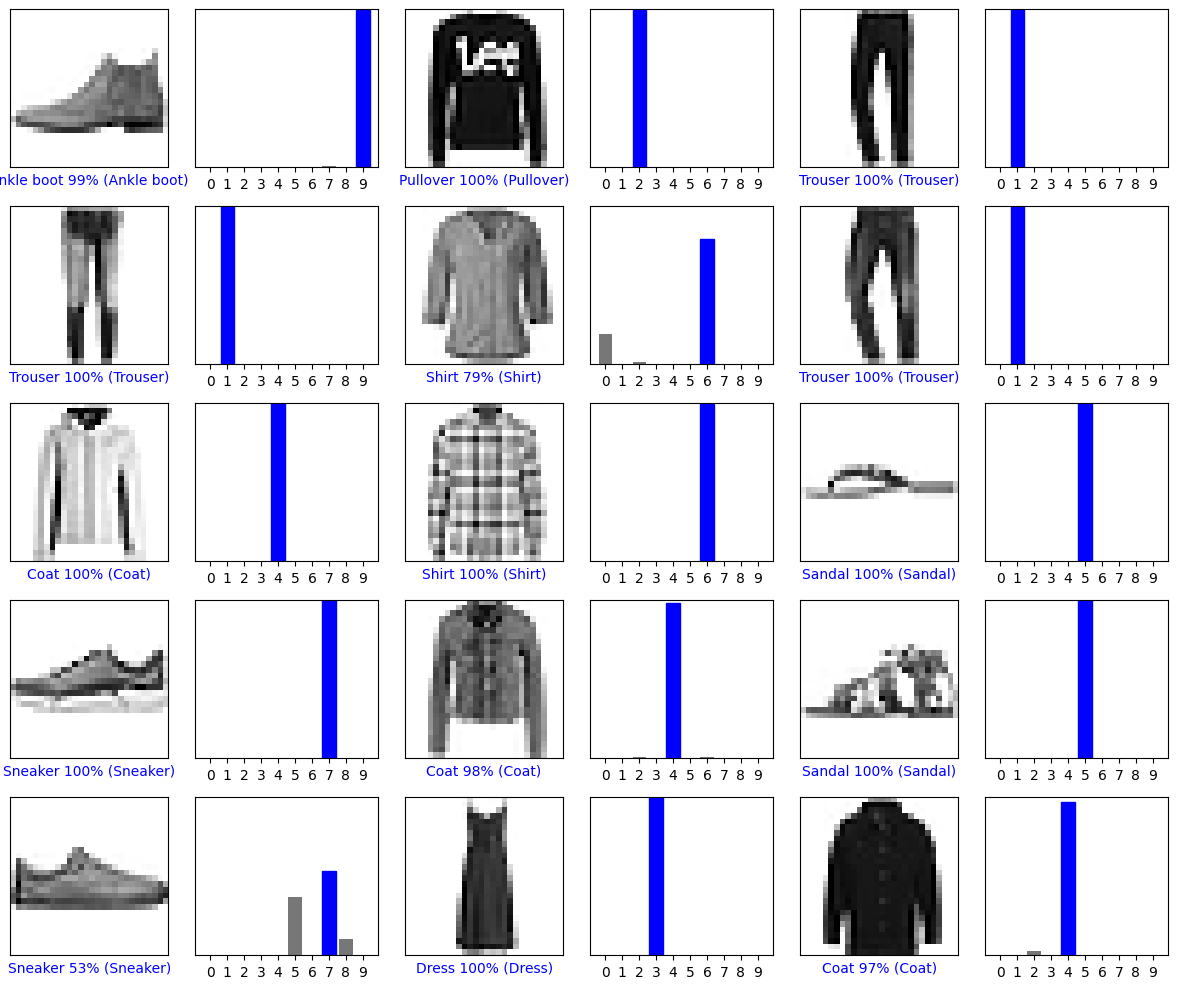

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_label)
plt.tight_layout()
plt.show()